# First Step

## (Choosing a framework / library for using the detector)

In [50]:
import torch
import torchvision
import cv2
import matplotlib.pyplot as plt

In [51]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True).cuda()
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequent

# Second Step

# (Running the detector on random images)

In [52]:
COCO_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [53]:
def read_image_to_numpy_and_tensor(img_path: str):
    img = cv2.imread(img_path)[:, :, ::-1] / 255  # invert channels
    
    # arr of bytes->float->numpy; put dim of channels to 1 place;
    img_tensor = torch.from_numpy(img.astype('float32')).permute(2, 0, 1)

    img_tensor = img_tensor[None, :]  # add axis
    return img, img_tensor


In [54]:
def get_prediction(img_tensor, model, threshold=0.5):
    prediction = model(img_tensor)
    # prediction — dict, key 'boxes' — list of coordinates of boxes; filter predictions
    boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold]
    classes = prediction[0]['labels'][prediction[0]['scores'] > threshold]
    boxes = boxes.cpu().detach().numpy()  # detach from the graph of calculations
    labels = [COCO_NAMES[index.item()] for index in classes]
    return boxes, labels


In [55]:
def plot_boxes_and_labels(numpy_img, boxes, labels):
    numpy_img = numpy_img.astype('float32')

    for index, box in enumerate(boxes):
        numpy_img = cv2.rectangle(numpy_img, (box[0], box[1]), (box[2], box[3]), 255, 1)

        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (box[0], box[1])
        font_scale = numpy_img.shape[1] / 1500.0 + 0.2  # for readability of labels
        color = (255, 0, 0)
        thickness = 2 if font_scale > 0.5 else 1  # for readability of labels
        numpy_img = cv2.putText(numpy_img, labels[index], org, font, font_scale, color,
                                thickness)

    return numpy_img

In [66]:
def object_detection_api(img_path, threshold=0.5):
    img, img_tensor = read_image_to_numpy_and_tensor(img_path)
    img_tensor = img_tensor.cuda()
    boxes, labels = get_prediction(img_tensor, model, threshold)
    img_with_boxes = plot_boxes_and_labels(img, boxes, labels)

    plt.figure(figsize=(15,20)) # display the output image
    plt.axis('off')
    plt.imshow(img_with_boxes)
    plt.show()


--2020-06-16 20:46:40--  https://civileats.com/wp-content/uploads/2020/01/200108-on-farm-solar-dairy-crisis-organic-valley-climate-change-farm-income-3-kelly-placke.jpg
Resolving civileats.com (civileats.com)... 35.208.90.96
Connecting to civileats.com (civileats.com)|35.208.90.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 640063 (625K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 625.06K  --.-KB/s    in 0.1s    

2020-06-16 20:46:40 (5.72 MB/s) - ‘test.jpg’ saved [640063/640063]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


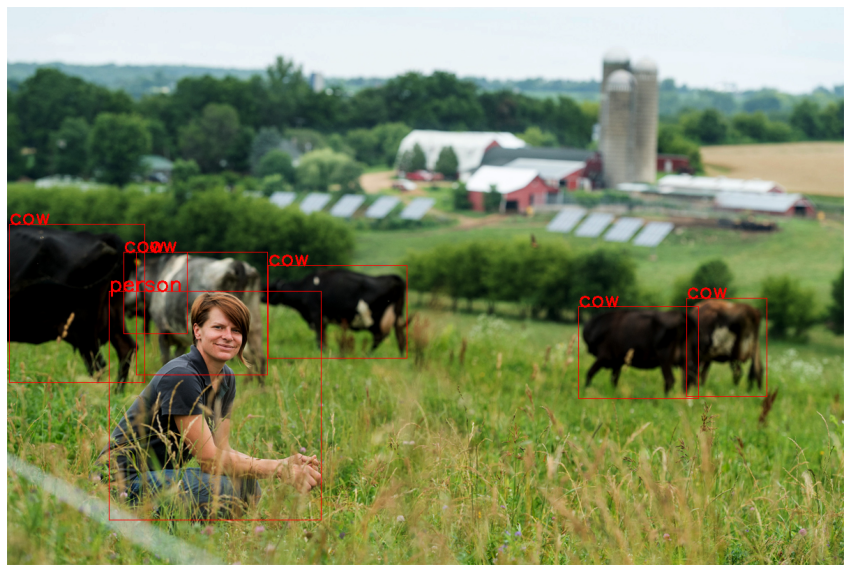

In [68]:
!wget https://civileats.com/wp-content/uploads/2020/01/200108-on-farm-solar-dairy-crisis-organic-valley-climate-change-farm-income-3-kelly-placke.jpg -O test.jpg
img_path = './test.jpg'
object_detection_api(img_path)

--2020-06-16 20:47:16--  https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.21.183, 104.18.20.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.21.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192644 (188K) [image/jpeg]
Saving to: ‘traffic.jpg’

traffic.jpg         100%[===================>] 188.13K  --.-KB/s    in 0.002s  

2020-06-16 20:47:16 (75.4 MB/s) - ‘traffic.jpg’ saved [192644/192644]



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


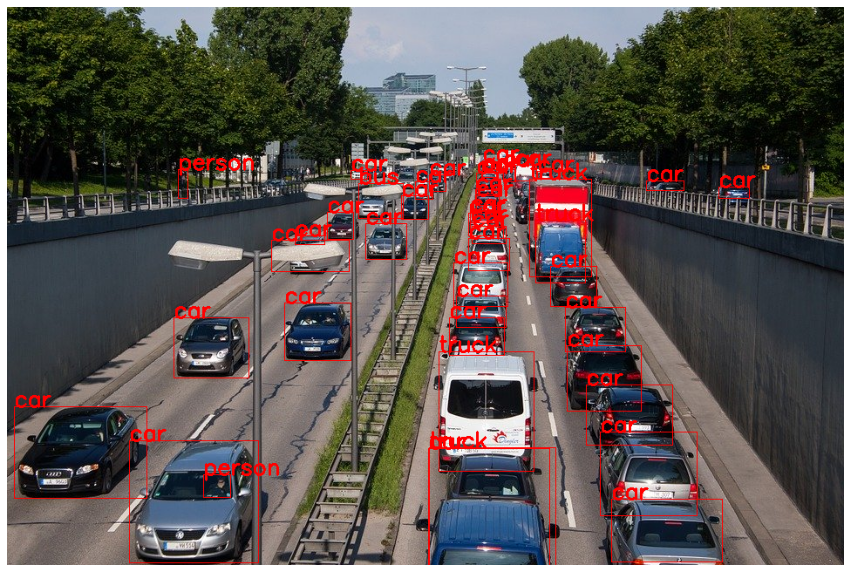

In [69]:
!wget https://cdn.pixabay.com/photo/2013/07/05/01/08/traffic-143391_960_720.jpg -O traffic.jpg
object_detection_api('./traffic.jpg')


# Third Step

# (Choosing web framework)

The main tool for developing a web demo will be the framework Flask.

# Fourth Step
## (Demo development)
[See repository](https://github.com/IlyaTorch/DLS_Detection)

# Fifth Step
## (Embedding the object detection model to the web demo)
[See repository](https://github.com/IlyaTorch/DLS_Detection)